In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import *

In [28]:
#N_cutoff = 16
gamma = 1.0
Delta = 1.0
J = 1.0
N = 30
U = 1.0/N
Fp = np.sqrt(N)*1.0

In [29]:
lista = []
lista2 =[]
for N_cutoff in range(80,83):
    a = destroy(N_cutoff)
    ad = a.dag()
    idty = qeye(N_cutoff)
    a1 = tensor(a,idty)
    a1d = a1.dag()
    a2 = tensor(idty,a)
    a2d = a2.dag()
    H_detuning = -Delta * (a1d * a1 + a2d * a2)
    H_nonlinear = U * (a1d * a1d * a1 * a1 + a2d * a2d * a2 * a2)
    H_hopping = -J * (tensor(ad,a) + tensor(a,ad))
    H_pump = Fp * (a1 + a1d + a2 + a2d)
    H = H_detuning + H_nonlinear + H_hopping + H_pump
    #rho_ss = steadystate(H, [a1+a2])
    #num_tot = expect(a1d*a1 + a2d*a2, rho_ss)
    rho0 = tensor(fock(N_cutoff,0),fock(N_cutoff,0))
    rho02 = tensor(fock(N_cutoff,5),fock(N_cutoff,5))
    c_ops_l = [a1,a2]
    c_ops_nl = [a1+a2]
    tlist = np.linspace(0,20,200)
    result = mcsolve(H,rho0,tlist,c_ops_l,[a1d*a1+a2d*a2],ntraj=200)
    result2 = mcsolve(H,rho02,tlist,c_ops_l,[a1d*a1+a2d*a2],ntraj=200)
    #result = mesolve(H,rho0,tlist,c_ops,[a1d*a1+a2d*a2])
    num_tot = result.expect[0]
    num_tot2 = result2.expect[0]
    lista.append(num_tot)
    lista2.append(num_tot2)

10.0%. Run time: 566.26s. Est. time left: 00:01:24:56
20.0%. Run time: 1075.04s. Est. time left: 00:01:11:40
30.0%. Run time: 1609.73s. Est. time left: 00:01:02:36
40.0%. Run time: 2100.83s. Est. time left: 00:00:52:31
50.0%. Run time: 2598.76s. Est. time left: 00:00:43:18
60.0%. Run time: 3077.04s. Est. time left: 00:00:34:11
70.0%. Run time: 3573.35s. Est. time left: 00:00:25:31
80.0%. Run time: 4078.91s. Est. time left: 00:00:16:59
90.0%. Run time: 4576.50s. Est. time left: 00:00:08:28
100.0%. Run time: 5027.51s. Est. time left: 00:00:00:00
Total run time: 5027.54s
10.0%. Run time: 518.76s. Est. time left: 00:01:17:48
20.0%. Run time: 1040.82s. Est. time left: 00:01:09:23
30.0%. Run time: 1562.24s. Est. time left: 00:01:00:45
40.0%. Run time: 2062.62s. Est. time left: 00:00:51:33
50.0%. Run time: 2606.67s. Est. time left: 00:00:43:26
60.0%. Run time: 3122.62s. Est. time left: 00:00:34:41
70.0%. Run time: 3639.28s. Est. time left: 00:00:25:59
80.0%. Run time: 4149.62s. Est. time left

In [30]:
qsave(lista,'nt_N30_Nmax8082_desde0')
qsave(lista2,'nt_N30_Nmax8082_desde5')

Text(0,0.5,'$n_{tot}/N$')

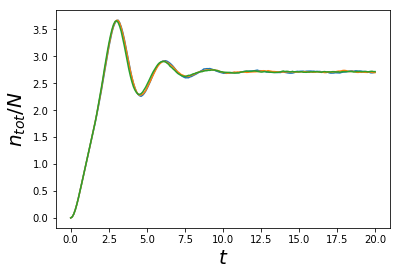

In [32]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist,[x/N for x in lista[0]])
axes.plot(tlist,[x/N for x in lista[1]])
axes.plot(tlist,[x/N for x in lista[2]])
#axes.plot(tlist,[x/N for x in lista2[0]])
#axes.plot(tlist,[x/N for x in lista2[1]])
#axes.plot(tlist,[x/N for x in lista2[2]])
axes.set_xlabel(r'$t$',fontsize=20)
axes.set_ylabel(r'$n_{tot}/N$',fontsize=20)

In [169]:
gamma = 1.0
Delta = 1.0
J = 1.0
N = 10
U = 1.0/N
Fp = np.sqrt(N)*0.61

In [ ]:
lista = []
lista2 =[]
for N_cutoff in range(30,32):
    a = destroy(N_cutoff)
    ad = a.dag()
    idty = qeye(N_cutoff)
    a1 = tensor(a,idty)
    a1d = a1.dag()
    a2 = tensor(idty,a)
    a2d = a2.dag()
    H_detuning = -Delta * (a1d * a1 + a2d * a2)
    H_nonlinear = U * (a1d * a1d * a1 * a1 + a2d * a2d * a2 * a2)
    H_hopping = -J * (tensor(ad,a) + tensor(a,ad))
    H_pump = Fp * (a1 + a1d + a2 + a2d)
    H = H_detuning + H_nonlinear + H_hopping + H_pump
    #rho_ss = steadystate(H, [a1+a2])
    #num_tot = expect(a1d*a1 + a2d*a2, rho_ss)
    rho0 = tensor(fock(N_cutoff,0),fock(N_cutoff,0))
    #rho02 = tensor(fock(N_cutoff,5),fock(N_cutoff,5))
    c_ops_l = [a1,a2]
    #c_ops_nl = [a1+a2]
    tlist = np.linspace(0,200,2000)
    result = mcsolve(H,rho0,tlist,c_ops_l,[a1d*a1+a2d*a2],ntraj=1000)
    #result2 = mcsolve(H,rho02,tlist,c_ops_l,[a1d*a1+a2d*a2],ntraj=400)
    #result = mesolve(H,rho0,tlist,c_ops,[a1d*a1+a2d*a2])
    num_tot = result.expect[0]
    #num_tot2 = result2.expect[0]
    lista.append(num_tot)
    #lista2.append(num_tot2)

10.0%. Run time:  95.39s. Est. time left: 00:00:14:18


In [8]:
qsave(lista,'nt_N10_Nmax3032_desde0')
qsave(lista2,'nt_N10_Nmax3032_desde5')

In [ ]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist,[x for x in lista[0]])
axes.plot(tlist,[x for x in lista[1]])
#axes.plot(tlist,[x for x in lista[2]])
#axes.plot(tlist,[x/N for x in lista2[0]])
#axes.plot(tlist,[x/N for x in lista2[1]])
#axes.plot(tlist,[x/N for x in lista2[2]])
axes.set_xlabel(r'$t$',fontsize=20)
axes.set_ylabel(r'$n_{tot}/N$',fontsize=20)

In [64]:
a=np.arange(20)
prueba = [x/N for x in lista[0]]

In [141]:
aux = lista[0]

In [140]:
lista[0]

array([ 0.        ,  0.06840815,  0.25786322,  0.54349049,  0.89993777,
        1.30272314,  1.72934479,  2.16006667,  2.57836288,  2.97105556,
        3.32821086,  3.64286771,  3.91066943,  4.12945581,  4.29885776,
        4.4199219 ,  4.49477999,  4.52636888,  4.51820062,  4.47417814,
        4.39845026,  4.29529887,  4.16905109,  4.02401028,  3.86440001,
        3.69431687,  3.51768859,  3.33823533,  3.15943296,  2.98447798,
        2.81625455,  2.65730452,  2.50980167,  2.3755315 ,  2.25587795,
        2.1518179 ,  2.06392429,  1.99237827,  1.93698998,  1.89722781,
        1.87225475,  1.86097095,  1.86206071,  1.87404225,  1.89531867,
        1.92422815,  1.95909206,  1.99825941,  2.04014668,  2.08327197,
        2.12628321,  2.16797977,  2.20732789,  2.24346974,  2.27572682,
        2.30359814,  2.32675375,  2.34502458,  2.35838906,  2.36695745,
        2.37095454,  2.3707013 ,  2.36659624,  2.35909679,  2.34870141,
        2.33593251,  2.32132077,  2.30539088,  2.288649  ,  2.27

In [168]:
lista[0][1000]

2.2056783397255026

In [5]:
gamma = 1.0
Delta = 1.0
J = 1.0
N = 1
U = 1.0/N
Fp = np.sqrt(N)*1.0

In [20]:
lista = []
lista2 =[]
for N_cutoff in range(10,11):
    a = destroy(N_cutoff)
    ad = a.dag()
    idty = qeye(N_cutoff)
    a1 = tensor(a,idty)
    a1d = a1.dag()
    a2 = tensor(idty,a)
    a2d = a2.dag()
    H_detuning = -Delta * (a1d * a1 + a2d * a2)
    H_nonlinear = U * (a1d * a1d * a1 * a1 + a2d * a2d * a2 * a2)
    H_hopping = -J * (tensor(ad,a) + tensor(a,ad))
    H_pump = Fp * (a1 + a1d + a2 + a2d)
    H = H_detuning + H_nonlinear + H_hopping + H_pump
    #rho_ss = steadystate(H, [a1+a2])
    #num_tot = expect(a1d*a1 + a2d*a2, rho_ss)
    rho0 = tensor(fock(N_cutoff,0),fock(N_cutoff,0))
    rho02 = tensor(fock(N_cutoff,5),fock(N_cutoff,5))
    c_ops_l = [a1,a2]
    c_ops_nl = [a1+a2]
    tlist = np.linspace(0,35,350)
    result = mesolve(H,rho0,tlist,c_ops_l,[a1d*a1+a2d*a2])
    #result2 = mesolve(H,rho02,tlist,c_ops_l,[a1d*a1+a2d*a2])
    #result = mesolve(H,rho0,tlist,c_ops,[a1d*a1+a2d*a2])
    num_tot = result.expect[0]
    #num_tot2 = result2.expect[0]
    lista.append(num_tot)
    #lista2.append(num_tot2)

In [21]:
ss = steadystate(H,c_ops_l)
promedio = expect(a1d*a1+a2d*a2,ss)

In [27]:
qsave(lista,'nt_N4_Nmax1517_desde0')
qsave(lista2,'nt_N4_Nmax1517_desde5')

Text(0,0.5,'$n_{tot}/N$')

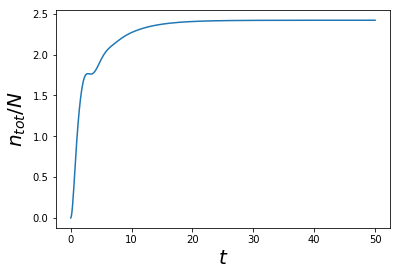

In [10]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist,[x/1 for x in lista[0]])
#axes.plot(tlist,[x/1 for x in lista[1]])
#axes.plot(tlist,[x/1 for x in lista[2]])
#axes.plot(tlist,[x/1 for x in lista2[0]])
#axes.plot(tlist,[x/1 for x in lista2[1]])
#axes.plot(tlist,[x/1 for x in lista2[2]])
axes.set_xlabel(r'$t$',fontsize=20)
axes.set_ylabel(r'$n_{tot}/N$',fontsize=20)

In [11]:
lista[0]

array([ 0.        ,  0.01903936,  0.07176796,  0.15128906,  0.25064984,
        0.36326167,  0.4832365 ,  0.60561523,  0.72648679,  0.84300441,
        0.95330791,  1.05636605,  1.15176613,  1.23948886,  1.3197082 ,
        1.3926449 ,  1.45848448,  1.5173532 ,  1.56933532,  1.6145121 ,
        1.65300621,  1.68502022,  1.71086303,  1.73096153,  1.74585768,
        1.75619269,  1.76268174,  1.76608307,  1.76716551,  1.7666779 ,
        1.76532262,  1.76373466,  1.76246639,  1.76197806,  1.76263331,
        1.76469914,  1.76834961,  1.77367262,  1.78067898,  1.78931318,
        1.79946492,  1.81098105,  1.82367709,  1.83734806,  1.85177835,
        1.8667503 ,  1.88205173,  1.89748211,  1.91285753,  1.92801456,
        1.94281284,  1.95713671,  1.97089569,  1.98402422,  1.99648048,
        2.00824468,  2.0193167 ,  2.02971355,  2.0394664 ,  2.04861768,
        2.05721809,  2.06532376,  2.07299366,  2.08028722,  2.08726233,
        2.09397367,  2.10047139,  2.10680013,  2.11299841,  2.11

In [12]:
lista[0][-1] - lista[0][-2]

3.9140488361510961e-07

In [14]:
promedio

2.4215027499150983

In [22]:
lista[0][-1]-promedio

-0.00051369920353261378

In [23]:
lista[0][-1]-promedio

-0.00051369920353261378

In [78]:
kito = qload('nt_N10_Nmax3032_desde0')

Loaded list object.


In [79]:
kito2 = qload('nt_N10_Nmax3032_desde5')

Loaded list object.


Text(0,0.5,'$n_{tot}/N$')

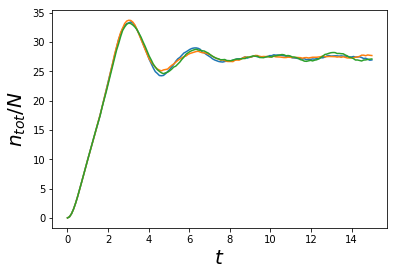

In [85]:
fig, axes = plt.subplots(1,1)
axes.plot(np.linspace(0,15,150),[x/1 for x in kito[0]])
axes.plot(np.linspace(0,15,150),[x/1 for x in kito[1]])
axes.plot(np.linspace(0,15,150),[x/1 for x in kito[2]])
axes.plot(np.linspace(0,15,150),[x/1 for x in kito2[0]])
axes.plot(np.linspace(0,15,150),[x/1 for x in kito2[1]])
axes.plot(np.linspace(0,15,150),[x/1 for x in kito2[2]])
axes.set_xlabel(r'$t$',fontsize=20)
axes.set_ylabel(r'$n_{tot}/N$',fontsize=20)

In [83]:
kito[0]

array([0.0, 0.1921375555015791, 0.7240909836356534, 1.5264515203457947,
       2.5307566840833915, 3.674301852522082, 4.9077545253679435,
       6.189066838822739, 7.4868426166829645, 8.773128950695053,
       10.070720658056965, 11.306000872325935, 12.494832135669139,
       13.753877647566487, 14.999605703103386, 16.22994496051773,
       17.55698079613674, 18.946408650985852, 20.421539765798926,
       21.848456553230438, 23.3164965449404, 24.70083885587643,
       26.120715646435627, 27.582882147035114, 28.995456239496775,
       30.344302566297152, 31.376652653779626, 32.249098450070846,
       32.765792016402145, 33.106247261940304, 33.232060457100985,
       33.403853941302216, 33.21323576718005, 32.77712824649642,
       32.08451382752319, 31.413661743720326, 30.53562035153926,
       29.626378372407448, 28.78635343784606, 27.98197085929121,
       27.032117518024698, 26.269630390743178, 25.55111455865264,
       24.92937620739063, 24.618235668241322, 24.2680736075002,
       2